In [ ]:
from datasets import load_dataset,load_from_disk
from transformers import AutoTokenizer,DistilBertForSequenceClassification
import matplotlib.pyplot as plt
import torch
import numpy as np

c:\Users\DHRUV\anaconda3\envs\image\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Loading and analysing dataset

In [2]:
ds = load_dataset("google-research-datasets/go_emotions", "simplified")
ds.save_to_disk(r"C:\Users\DHRUV\Desktop\IProject\emotion_dataset")

c:\Users\DHRUV\anaconda3\envs\image\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\DHRUV\.cache\huggingface\hub\datasets--google-research-datasets--go_emotions. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Saving the dataset (1/1 shards): 100%|██████████| 5427/5427 [00:00<00:00, 617472.00 examples/s

In [3]:
dataset = load_from_disk(r"C:\Users\DHRUV\Desktop\IProject\emotion_dataset")

In [4]:
dataset["train"]

Dataset({
    features: ['text', 'labels', 'id'],
    num_rows: 43410
})

In [5]:
dataset["train"].features["labels"].feature

ClassLabel(names=['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral'])

In [6]:
for ind,example in enumerate(dataset["train"]):
    if ind < 50:
        print(example)
    else:
        break

{'text': "My favourite food is anything I didn't have to cook myself.", 'labels': [27], 'id': 'eebbqej'}
{'text': 'Now if he does off himself, everyone will think hes having a laugh screwing with people instead of actually dead', 'labels': [27], 'id': 'ed00q6i'}
{'text': 'WHY THE FUCK IS BAYLESS ISOING', 'labels': [2], 'id': 'eezlygj'}
{'text': 'To make her feel threatened', 'labels': [14], 'id': 'ed7ypvh'}
{'text': 'Dirty Southern Wankers', 'labels': [3], 'id': 'ed0bdzj'}
{'text': "OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe PlAyOfFs! Dumbass Broncos fans circa December 2015.", 'labels': [26], 'id': 'edvnz26'}
{'text': 'Yes I heard abt the f bombs! That has to be why. Thanks for your reply:) until then hubby and I will anxiously wait 😝', 'labels': [15], 'id': 'ee3b6wu'}
{'text': 'We need more boards and to create a bit more space for [NAME]. Then we’ll be good.', 'labels': [8, 20], 'id': 'ef4qmod'}
{'text': 'Damn youtube and outrage drama is super lucrative for reddit', 'labels': [

In [7]:
#Their are many samples with emojis and many with unknown characters like [NAME] all those will be taken care in tokenization

## Hugging face dataset to pandas dataset

In [8]:
dataset.set_format("pandas")
df = dataset["train"][:]
df.head()

,text,labels,id
0,My favourite food is anything I didn't have to...,[27],eebbqej
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj
3,To make her feel threatened,[14],ed7ypvh
4,Dirty Southern Wankers,[3],ed0bdzj


In [9]:
bd = len(df["labels"])

In [10]:
for ind in range(len(df['labels'])):
    if len(df["labels"][ind]) >1:
        df = df.drop(ind)
df.head()

,text,labels,id
0,My favourite food is anything I didn't have to...,[27],eebbqej
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj
3,To make her feel threatened,[14],ed7ypvh
4,Dirty Southern Wankers,[3],ed0bdzj


In [11]:
print(f"After deleting the samples with multiple labels for plotting the length is {len(df['labels'])} before it was {bd}")

After deleting the samples with multiple labels for plotting the length is 36308 before it was 43410


In [12]:
def interger_to_string(label):
    return dataset["train"].features["labels"].feature.int2str(label)

df["label_text"] = df["labels"].apply(interger_to_string)

In [13]:
df = df.drop(columns="id")
df.head()

,text,labels,label_text
0,My favourite food is anything I didn't have to...,[27],[neutral]
1,"Now if he does off himself, everyone will thin...",[27],[neutral]
2,WHY THE FUCK IS BAYLESS ISOING,[2],[anger]
3,To make her feel threatened,[14],[fear]
4,Dirty Southern Wankers,[3],[annoyance]


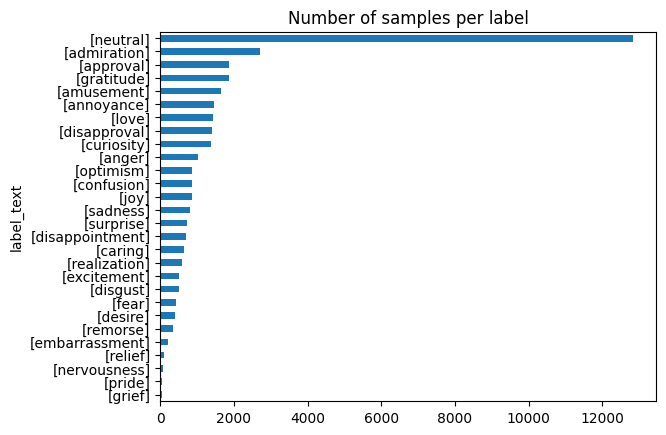

In [14]:
df["label_text"].value_counts(ascending = True).plot.barh()
plt.title("Number of samples per label")
plt.show()

In [15]:
#As we can see in their are many samples of neutral and very less of grief also their were many samples which belonged to more than one label we have ignored those sample in this comparsion

In [16]:
del(df)

# Making token encodings

In [17]:
dataset = load_from_disk(r"C:\Users\DHRUV\Desktop\IProject\emotion_dataset")

In [18]:
tokenizor = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")

c:\Users\DHRUV\anaconda3\envs\image\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\DHRUV\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


## Tokenize the whole dataset

In [19]:
def tokenize(batch):
    return tokenizor(batch["text"],padding = True,truncation=True)

dataset_encoded = dataset.map(tokenize,batch_size=None,batched=True)
dataset_encoded["train"]

Map: 100%|██████████| 5426/5426 [00:00<00:00, 31239.04 examples/s]


Dataset({
    features: ['text', 'labels', 'id', 'input_ids', 'attention_mask'],
    num_rows: 43410
})

In [20]:
for i in dataset_encoded["train"]:
    print(i)
    break

{'text': "My favourite food is anything I didn't have to cook myself.", 'labels': [27], 'id': 'eebbqej', 'input_ids': [101, 2026, 8837, 2833, 2003, 2505, 1045, 2134, 1005, 1056, 2031, 2000, 5660, 2870, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

# Predicting From Model

In [21]:
def mutlilabel_handler(batch):
    num_labels = 28
    multi_hot = np.zeros(num_labels,dtype=float)
    for labels in batch["labels"]:
        multi_hot[labels] = 1.0
    
    batch["labels"] = multi_hot.tolist()
    return batch

In [22]:
dataset_adjusted = dataset_encoded.map(mutlilabel_handler)

Map: 100%|██████████| 5426/5426 [00:00<00:00, 13667.21 examples/s]


In [23]:
model = DistilBertForSequenceClassification.from_pretrained("distilbert/distilbert-base-uncased",num_labels = 27,problem_type="multi_label_classification",device_map = "cuda",torch_dtype = "auto")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [24]:
def predict(batch):
    inputs = {k:torch.tensor(v).to("cuda") for k,v in batch.items() if k in tokenizor.model_input_names}
    with torch.no_grad():
        logits = model(**inputs).logits
        output = torch.sigmoid(logits)
    
    threshold = 0.5
    prediction = (output >= threshold).int().squeeze().tolist()

    return {"prediction" : prediction}

In [25]:
dataset_predicted = dataset_adjusted.map(predict,batch_size=20,batched=True)

Map: 100%|██████████| 5427/5427 [00:05<00:00, 1004.62 examples/s]


In [26]:
predicted_labels = torch.tensor([[float(x) for x in row] for row in dataset_predicted["train"]["labels"]])
actual_labels = torch.tensor([[float(x) for x in row] for row in dataset_adjusted["train"]["labels"]])

loss_fn = torch.nn.BCEWithLogitsLoss()
loss = loss_fn(actual_labels,predicted_labels)
print(f"Since we are dealing with multilabel classfication we can only see loss that is {loss} their is no point in ploting confusion matrix")

Since we are dealing with multilabel classfication we can only see loss that is 0.6771755218505859 their is no point in ploting confusion matrix
